In [53]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
data = load_breast_cancer()
X, Y = data.data, data.target

In [55]:
data.data.shape

(569, 30)

In [56]:
data.target.shape

(569,)

In [57]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [58]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [59]:
# Preprocessing

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

N, D = x_train.shape

In [60]:
# Build the model

model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [61]:
# Loss and optimizer

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters())

In [62]:
# Convert data to torch tensors

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [63]:
# Train the model

n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracies = np.zeros(n_epochs)
test_accuracies = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(x_train)
  loss = criterion(outputs, y_train)

  loss.backward()
  optimizer.step()

  outputs_test = model(x_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  with torch.no_grad():
    train_outputs_rounded = np.round(outputs.numpy())
    train_acc = np.mean(train_outputs_rounded == y_train.numpy())
    train_accuracies[it] = train_acc

    test_outputs_rounded = np.round(outputs_test.numpy())
    test_acc = np.mean(test_outputs_rounded == y_test.numpy())
    test_accuracies[it] = test_acc

  if (it + 1) == 1000:
    print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

  if (it + 1) % 50 == 0: 
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.4186, Test Loss: 0.4268
Epoch 100/1000, Train Loss: 0.3105, Test Loss: 0.3229
Epoch 150/1000, Train Loss: 0.2513, Test Loss: 0.2653
Epoch 200/1000, Train Loss: 0.2138, Test Loss: 0.2290
Epoch 250/1000, Train Loss: 0.1878, Test Loss: 0.2041
Epoch 300/1000, Train Loss: 0.1685, Test Loss: 0.1860
Epoch 350/1000, Train Loss: 0.1535, Test Loss: 0.1724
Epoch 400/1000, Train Loss: 0.1416, Test Loss: 0.1618
Epoch 450/1000, Train Loss: 0.1317, Test Loss: 0.1534
Epoch 500/1000, Train Loss: 0.1235, Test Loss: 0.1465
Epoch 550/1000, Train Loss: 0.1164, Test Loss: 0.1409
Epoch 600/1000, Train Loss: 0.1103, Test Loss: 0.1363
Epoch 650/1000, Train Loss: 0.1049, Test Loss: 0.1323
Epoch 700/1000, Train Loss: 0.1002, Test Loss: 0.1290
Epoch 750/1000, Train Loss: 0.0960, Test Loss: 0.1262
Epoch 800/1000, Train Loss: 0.0922, Test Loss: 0.1237
Epoch 850/1000, Train Loss: 0.0887, Test Loss: 0.1216
Epoch 900/1000, Train Loss: 0.0856, Test Loss: 0.1198
Epoch 950/1000, Train Loss: 0

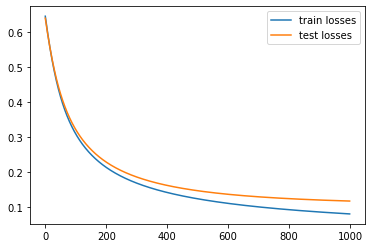

In [64]:
# Plot

plt.plot(train_losses, label='train losses')
plt.plot(test_losses, label='test losses')
plt.legend()
plt.show()

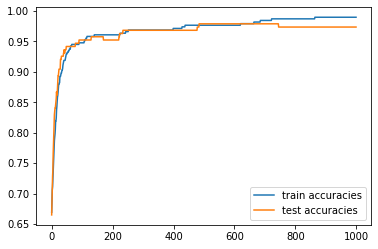

In [65]:
# Accuracy per iteration

plt.plot(train_accuracies, label='train accuracies')
plt.plot(test_accuracies, label='test accuracies')
plt.legend()
plt.show()

In [67]:
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()

In [68]:
# Save model

model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3612, -0.4557, -0.3773, -0.4299, -0.3063, -0.3470, -0.2253, -0.3083,
                       -0.1670,  0.6659, -0.3528,  0.1854, -0.4902, -0.4269, -0.2078,  0.0984,
                       -0.0227, -0.1220,  0.2337,  0.5172, -0.3913, -0.5299, -0.4350, -0.2033,
                       -0.3429, -0.2526, -0.4076, -0.3877, -0.2786, -0.4093]])),
             ('0.bias', tensor([0.3505]))])

In [70]:
torch.save(model.state_dict(), 'my_linear_classification_model.pt')

In [71]:
!ls

my_linear_classification_model.pt  sample_data
